This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> 

Where Do People Drink The Most Beer, Wine And Spirits? </a> 

The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from pycaret.regression import *

%matplotlib inline

In [2]:
df = pd.read_csv("drinks.csv")

In [3]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### Question 1: Display the data types of each column using the attribute dtype.

In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

### Question 2 use the method groupby to get the number of wine servings per continent:

In [6]:
cont = df.groupby(by='continent').sum()

In [7]:
cont

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,3258,866,862,159.4
Asia,1630,2677,399,95.5
Europe,8720,5965,6400,387.8
North America,3345,3812,564,137.9
Oceania,1435,935,570,54.1
South America,2101,1377,749,75.7


### Question 3: Perform a statistical summary and analysis of beer servings for each continent:

In [8]:
cont.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,6.000000,6.000000,6.000000,6.000000
mean,3414.833333,2605.333333,1590.666667,151.733333
std,2720.507116,2003.628575,2361.563860,122.027155
min,1435.000000,866.000000,399.000000,54.100000
25%,1747.750000,1045.500000,565.500000,80.650000
50%,2679.500000,2027.000000,659.500000,116.700000
75%,3323.250000,3528.250000,833.750000,154.025000
max,8720.000000,5965.000000,6400.000000,387.800000


### Question 4: Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent

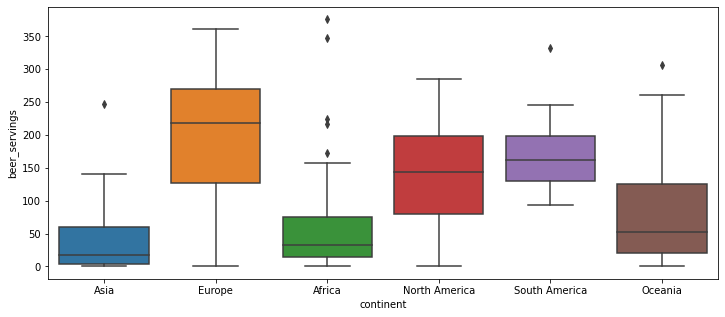

In [9]:
plt.figure(figsize=(12,5))
sns.boxplot(x='continent', y = 'beer_servings', data=df);

### Question 5: Use the function  regplot in the seaborn library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings

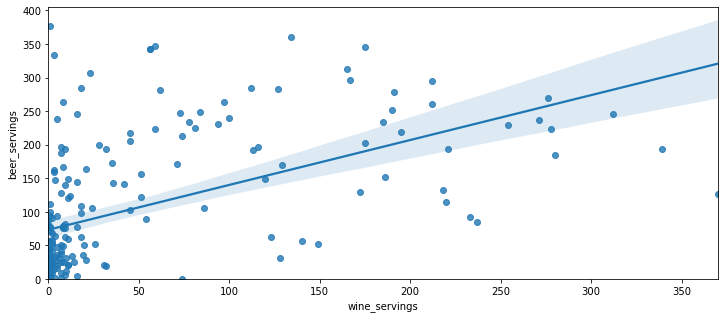

In [10]:
plt.figure(figsize=(12,5))
sns.regplot(x="wine_servings", y="beer_servings", data=df)
plt.ylim(0,);

### Question 6: Fit a linear regression model to predict the 'total_litres_of_pure_alcohol' using the number of 'wine_servings' then calculate $R^{2}$:

In [11]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [12]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [13]:
exp1 = setup(data=df, target='total_litres_of_pure_alcohol', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(193, 6)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.790300,1.884500,1.254100,0.869500,0.253000,0.360600
1,Ridge Regression,0.820900,2.195900,1.363100,0.845500,0.339000,0.736100
2,TheilSen Regressor,0.820100,2.198500,1.366300,0.845300,0.338800,0.734100
3,Linear Regression,0.821400,2.198700,1.366400,0.845300,0.339400,0.738000
4,Random Sample Consensus,0.816100,2.195300,1.353800,0.845200,0.331600,0.716200
5,K Neighbors Regressor,0.925700,2.284700,1.415500,0.838100,0.311800,0.520900
6,Lasso Regression,0.932200,2.396400,1.414000,0.828700,0.363500,0.783600
7,Elastic Net,0.930700,2.396200,1.413400,0.828700,0.362700,0.778400
8,Bayesian Ridge,0.927800,2.418600,1.418700,0.827600,0.369900,0.809600
9,Huber Regressor,0.635600,2.441000,1.341200,0.827100,0.295600,0.294100


In [15]:
random = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0233,2.5000,1.5812,0.7752,0.3899,0.5269
1,0.7079,1.0187,1.0093,0.9049,0.2029,0.2036
2,0.5452,0.7884,0.8879,0.9545,0.1513,0.2987
3,0.6414,1.0125,1.0062,0.9170,0.2427,0.3503
4,0.3220,0.2024,0.4499,0.9847,0.0535,0.0701
5,0.5962,0.6959,0.8342,0.9205,0.2362,0.3527
6,1.3607,5.7444,2.3968,0.7043,0.3757,0.7231
7,1.1469,3.3752,1.8372,0.8153,0.3238,0.3721
8,0.9306,2.7146,1.6476,0.7802,0.3778,0.3117
9,0.6287,0.7930,0.8905,0.9384,0.1762,0.3972


In [16]:
print(random)

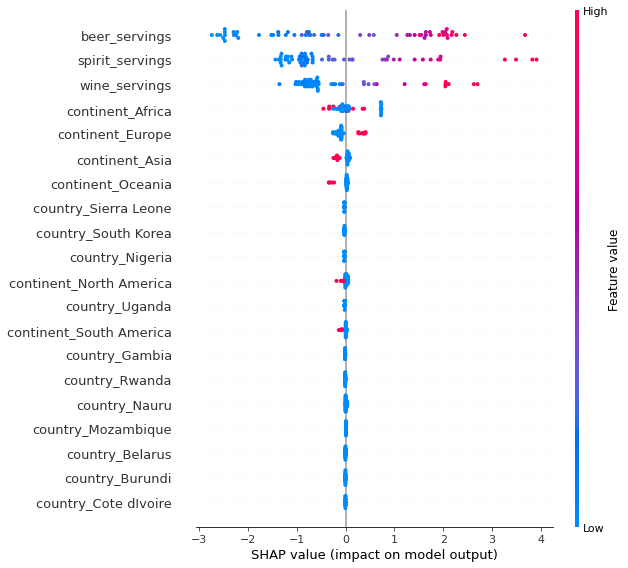

In [17]:
interpret_model(random)

In [18]:
predict_model(random)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.5938,0.6784,0.8237,0.9496,0.2215,0.3508


,beer_servings,spirit_servings,wine_servings,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Antigua & Barbuda,country_Argentina,...,country_Zambia,country_Zimbabwe,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,total_litres_of_pure_alcohol,Label
0,93.0,302.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.1,6.7661
1,217.0,57.0,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.9,5.6913
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.1033
3,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.1,0.0144
4,77.0,189.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.9,4.5161
5,28.0,31.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.5,1.4014
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.1033
7,281.0,216.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.5,10.6279
8,219.0,126.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.4,10.2066
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.1467
